In [328]:
from random import randint
import pandas as pd 

class Strategy:
    def __init__(self):
        pass

    def guess(self, n):
        a, b = 0, 1
        for _ in range(n):
            yield a
            a, b = b, a + b

    def guess2(self, n):
        a = 0
        for _ in range(n):
            yield 2**a
            a += 1
    
    def guess_mul(self, n):
        a = 1
        for _ in range(n):
            yield a
            a = 2*a
    
    def guess_ap(self, n):
        a = 1
        for _ in range(n):
            yield a
            a = 2 + a
    
    def guess_ap_e(self, n):
        a = 1
        for _ in range(n):
            yield a
            a = 2.718 + a
    
    def guess_ap_pie(self, n):
        a = 1
        for _ in range(n):
            yield a
            a = 2.6 + a
    
class Simulate:
    def __init__(self, runs, strategy, a=100):
        self.runs = runs
        self.strategy = strategy
        self.a = a
        self.run_info = []
    
    def simulate(self):
        
        # for each run
        for i in range(self.runs):
            
            # generate random environment
            environ = randint(0, randint(1, self.a))
                        
            # find the floors
            g = 0
            attempt = 1
            
            # initiate strategy generator
            gen = strategy.guess_ap_pie(2 * environ)
            
            while g < environ:
                # get guess based on strategy
                val = int(next(gen))
                g += val 
                attempt += 1

            # calculate distance
            distance = g - environ
                        
            # log run info
            self.run_info.append([i, environ, g, distance, attempt])
        
    def simulation_stats(self):
        info_df = pd.DataFrame(self.run_info, columns=["run_id", "environ", "final_guess", "distance", "attempt"])
        
        avg_distance = info_df["distance"].mean()
        avg_attempt = info_df["attempt"].mean()
        
        return avg_distance, avg_attempt

In [329]:
strategy = Strategy()
simulate = Simulate(100000, strategy)

In [302]:
simulate.simulate()
simulate.simulation_stats()

(4.1827, 5.83473)

In [305]:
simulate.simulate()
simulate.simulation_stats()

(4.99218, 5.48083)

In [330]:
simulate.simulate()
simulate.simulation_stats()

(4.88541, 5.54727)

In [312]:
from joblib import Parallel, delayed

In [331]:
strategy = Strategy()

def multisrun(a):
    ans = []
    print(f"a: {a}")
    
    simulate = Simulate(100000, strategy, a=a)

    for i in range(10):
        
        simulate.simulate()
        
        avg_distance, avg_attempt = simulate.simulation_stats()
        
        temp = {}
        
        temp["a"] = a
        temp["i"] = i
        temp["avg_distance"] = avg_distance
        temp["avg_attempt"] = avg_attempt
        
        ans.append(temp)
    
    return ans

In [332]:
out = Parallel(n_jobs=20, backend="multiprocessing")(delayed(multisrun)(a)for a in range(1, 1000, 10))

a: 1
a: 11
a: 21
a: 31
a: 41
a: 51
a: 71
a: 81
a: 61
a: 91
a: 101
a: 111
a: 121
a: 131
a: 141
a: 151
a: 161
a: 171
a: 181
a: 191
a: 201
a: 211
a: 221
a: 231
a: 241
a: 251
a: 261
a: 271
a: 281
a: 291
a: 301
a: 311
a: 321
a: 331
a: 341
a: 351
a: 361
a: 371
a: 381
a: 391
a: 401
a: 411
a: 421
a: 431
a: 441
a: 451
a: 461
a: 471
a: 481
a: 491
a: 501
a: 511
a: 521
a: 531
a: 541
a: 551
a: 561
a: 571
a: 581
a: 591
a: 601
a: 611
a: 621
a: 631
a: 641
a: 651
a: 661
a: 671
a: 681
a: 691
a: 701
a: 711
a: 721
a: 731
a: 741
a: 751
a: 761
a: 771
a: 781
a: 791
a: 801
a: 811
a: 821
a: 831
a: 841
a: 851
a: 861
a: 871
a: 881
a: 891
a: 901
a: 911
a: 921
a: 931
a: 941
a: 951
a: 961
a: 971
a: 981
a: 991


In [333]:
output = []
for o in out:
    output += o

In [334]:
df = pd.DataFrame(output)

In [335]:
df

,a,i,avg_distance,avg_attempt
0,1,0,0.000000,1.499150
1,1,1,0.000000,1.499535
2,1,2,0.000000,1.499647
3,1,3,0.000000,1.499515
4,1,4,0.000000,1.499504
...,...,...,...,...
995,991,5,15.847782,14.002675
996,991,6,15.851847,14.004123
997,991,7,15.853251,14.006412
998,991,8,15.854181,14.005024


<AxesSubplot:xlabel='a'>

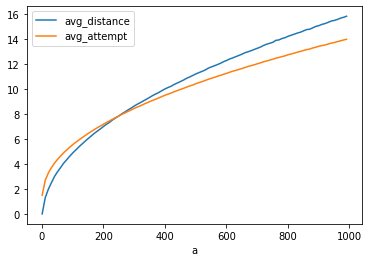

In [336]:
df.groupby("a").agg({"avg_distance":"mean", "avg_attempt":"mean"}).reset_index().plot("a", ["avg_distance", "avg_attempt"])

### Multiplier of 2

<AxesSubplot:xlabel='a'>

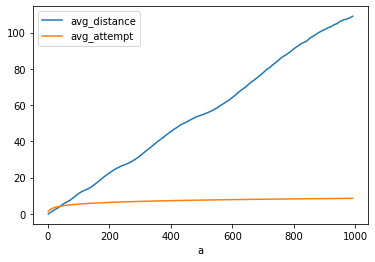

In [250]:
df.groupby("a").agg({"avg_distance":"mean", "avg_attempt":"mean"}).reset_index().plot("a", ["avg_distance", "avg_attempt"])

### Aritimatic Progression - a ~= 2.718

<AxesSubplot:xlabel='a'>

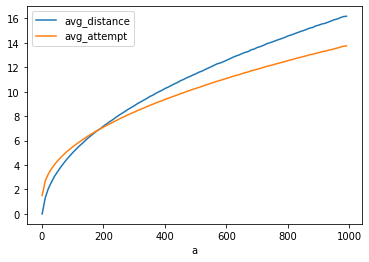

In [279]:
df.groupby("a").agg({"avg_distance":"mean", "avg_attempt":"mean"}).reset_index().plot("a", ["avg_distance", "avg_attempt"])

### Aritimatic Progression - a = 2

<AxesSubplot:xlabel='a'>

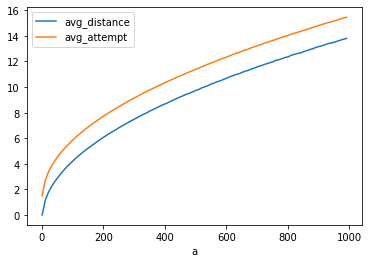

In [240]:
df.groupby("a").agg({"avg_distance":"mean", "avg_attempt":"mean"}).reset_index().plot("a", ["avg_distance", "avg_attempt"])

### Power of 2 steps

<AxesSubplot:xlabel='a'>

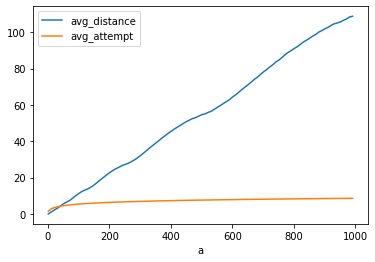

In [227]:
df.groupby("a").agg({"avg_distance":"mean", "avg_attempt":"mean"}).reset_index().plot("a", ["avg_distance", "avg_attempt"])

### Fibonaci steps

<AxesSubplot:xlabel='a'>

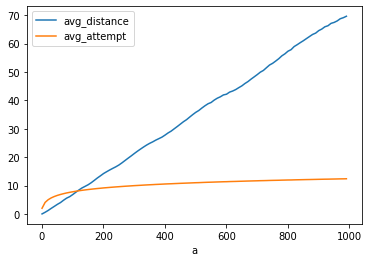

In [218]:
df.groupby("a").agg({"avg_distance":"mean", "avg_attempt":"mean"}).reset_index().plot("a", ["avg_distance", "avg_attempt"])